<a href="https://colab.research.google.com/github/inhovation97/Get-an-education-Computer-Vision/blob/main/GAN/vae%EA%B3%BC%EC%A0%9C_denoising_autoencoder_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5 # noise 추가
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


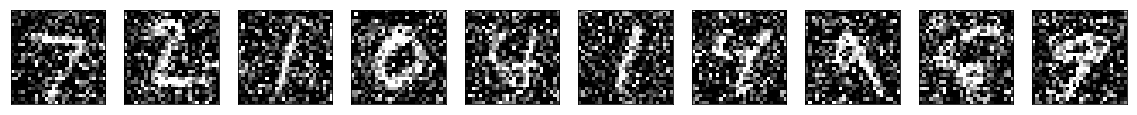

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

# Convolutional AutoEncoder 모델을 설계해 주세요.
# Model Architecture 와 loss function 구성은 모두 자유입니다.
# Autoencoder도 괜찮고 Variational Autoencoder도 괜찮습니다.

input_img = Input(shape=(28, 28, 1))



autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0725 02:07:00.205873 139976752695168 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 02:07:00.218744 139976752695168 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 02:07:00.223129 139976752695168 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 02:07:00.236128 139976752695168 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0725 02:07:00.263387 139976752695168 deprecation_wrapp

In [ ]:
# fit 부분 작성하여 모델을 학습시켜주세요.

autoencoder.fit(



)

W0725 02:07:09.238270 139976752695168 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1769 - val_loss: 0.1199
Epoch 2/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1186 - val_loss: 0.1133
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1119 - val_loss: 0.1098
Epoch 4/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1082 - val_loss: 0.1064
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1058 - val_loss: 0.1033
Epoch 6/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1047 - val_loss: 0.1030
Epoch 7/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1035 - val_loss: 0.1008
Epoch 8/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1027 - val_loss: 0.1041
Epoch 9/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1020 - val_loss: 0.

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

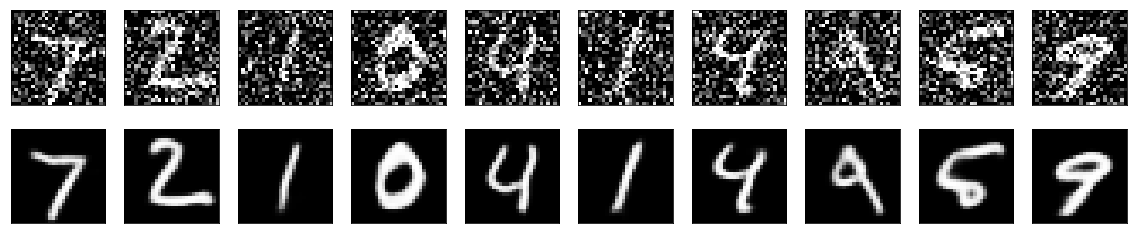

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()